<h1 style='text-align: center'> Logistic Regression </h1> 

### What is classification? 

A classification problem is when the output variable of your model is a category, such as “red” or “blue” or “disease” and “no disease”. Training a classification models involves "teaching" a computer to categorize data correctly. 

##### Classification Models

- logistic regression 
- KNN
- decision tree 
- random forest 
- gradient-boosted tree
- multilayer perceptrons (neural networks)
- support vector machines 
- Naive Bayes

##### Which of the following is/are classification problem(s)?

Predicting what genre of music a certain song is

Predicting house price based on area

Predicting whether monsoon will be normal next year

Predict the number of copies a music album will be sold next month

### Binary Classification

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Let's predict if we'll make a shot conditioned on how far we are from the basket**

In [22]:
makes = [1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0]    # <- if you made the shot then this is 1
distance = [i for i in range(30)]
#make numpy arrays
distance = np.array(distance).reshape(-1,1)
makes = np.array(makes).reshape(-1)

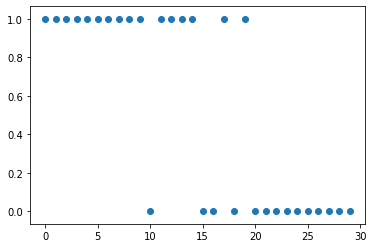

In [23]:
fig, ax = plt.subplots()
ax.scatter(distance,makes)
plt.show()

#### Linear Regression?

In [69]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(distance, makes)
# generate predictions
predictions = lr.predict(np.array(distance).reshape(-1,1))

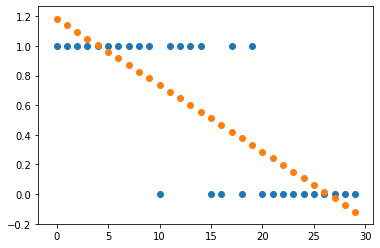

In [27]:
fig, ax = plt.subplots()
ax.scatter(distance,makes)
# plot linear regression predictions
ax.scatter(distance, predictions)

<img src='images/meh.gif'/>

##### Why is this not great? 

#### Logistic Regression

Logistic regression tries to "squish" our predictions into values between 0 and 1 to represent probabilities of a single data point belonging to class. 

In [108]:
pip install --upgrade pip scikit-learn

     |████████████████████████████████| 1.4MB 3.0MB/s eta 0:00:01
Requirement already up-to-date: scikit-learn in /Users/fabricemesidor/anaconda3/lib/python3.7/site-packages (0.21.3)
  Found existing installation: pip 19.2.2
    Uninstalling pip-19.2.2:
      Successfully uninstalled pip-19.2.2
Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg')
log_reg.fit(distance, makes)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
prob_1 = [proba[1] for proba in log_reg.predict_proba(distance)]

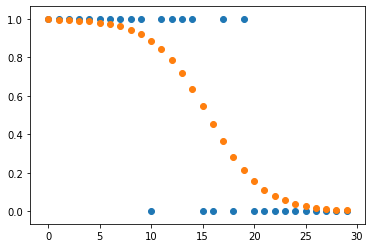

In [30]:
fig, ax = plt.subplots()
ax.scatter(distance,makes)
ax.scatter(distance, prob_1)
plt.show()

Each point is the probability that it belongs to the positive (1) class

#### Review : What is a linear model? 

<img src='images/ratatouille.gif'/>

Logistic regression is defined by this equation : 

<center>$Pr(Y_i=1|X_i) = {\frac{exp(\beta_0 + \beta_1X_i)}{1 + exp (\beta_0 + \beta_1X_i)}}$</center>

##### What is $\beta_0 + \beta_1X_i$? What does it give us? 

What are odds? 

The odds of an event represent the ratio of the (probability that the event will occur) / (probability that the event will not occur). This could be expressed as follows:

Odds of event = $ Y / (1-Y) $

<b>The value of odds range from 0 to ${\infty}$</b>

<b>When you take the log of the odds the values range from $-{\infty}$ to ${\infty}$</b>

Why might this be important?


** Hint ** : Think about linear regression and the relationship between coefficients and the dependent variable. 

<img src='images/banana_stretch.gif'/>

#### The coefficients

<b>How do we interpret our coefficients?<b>

<b>How do we determine the best coefficients? </b>

They are determined using a combination of maximum likelihood estimation and gradient descent but the specifics are outside of the scope of this class but additional resources are available below, if you would like to explore further. 

#### Additional Resources

- https://www.youtube.com/watch?v=vN5cNN2-HWE (Parts 1 - 3) 

- https://www.theanalysisfactor.com/why-use-odds-ratios/

- https://zlatankr.github.io/posts/2017/03/06/mle-gradient-descent (If you want to understand MLE and how parameters are found) 

- https://www.kaggle.com/mbkinaci/comprehensive-eda-on-r-with-logistic-regression (Good examples of EDA for classification problems) 

#### Try it yourself! 

Use the dataset below to predict whether it is going to rain in Australia tomorrow.

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('weatherAUS.csv')

##### Cleaning

In [33]:
#check for null values
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [34]:
df.shape

(142193, 24)

In [35]:
#drop columns that account > ~ 10% NaN values
df.drop(columns=['Evaporation', 'Sunshine',  'Pressure9am', 'Cloud9am', 'Cloud3pm'],  inplace=True)

In [36]:
#drop rows with NaN values
df.dropna(inplace=True)

In [37]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [38]:
df.shape

(113011, 19)

##### EDA

In [39]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,17.8,29.7,No,0.2,No


In [40]:
#how many of each class do we have? 
df.RainTomorrow.value_counts()

No     87972
Yes    25039
Name: RainTomorrow, dtype: int64

In [41]:
#correlation matrix 
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.728839,0.103662,0.159207,0.150617,0.146055,-0.218231,0.026853,-0.448201,0.898762,0.704367,0.126632
MaxTemp,0.728839,1.000000,-0.077101,0.056600,-0.006292,0.013768,-0.517202,-0.497685,-0.411405,0.884876,0.984348,-0.044228
Rainfall,0.103662,-0.077101,1.000000,0.130748,0.085710,0.060698,0.238867,0.259779,-0.126186,0.007212,-0.080655,0.318043
WindGustSpeed,0.159207,0.056600,0.130748,1.000000,0.589801,0.679282,-0.183615,-0.020737,-0.399600,0.124701,0.018185,0.161186
WindSpeed9am,0.150617,-0.006292,0.085710,0.589801,1.000000,0.499428,-0.221299,-0.017649,-0.150304,0.089433,-0.019430,0.066035
WindSpeed3pm,0.146055,0.013768,0.060698,0.679282,0.499428,1.000000,-0.093276,0.054121,-0.244179,0.126697,-0.011694,0.049044
Humidity9am,-0.218231,-0.517202,0.238867,-0.183615,-0.221299,-0.093276,1.000000,0.684337,0.168108,-0.464435,-0.510027,0.181928
Humidity3pm,0.026853,-0.497685,0.259779,-0.020737,-0.017649,0.054121,0.684337,1.000000,0.046202,-0.201993,-0.547138,0.315989
Pressure3pm,-0.448201,-0.411405,-0.126186,-0.399600,-0.150304,-0.244179,0.168108,0.046202,1.000000,-0.453051,-0.378603,-0.159676
Temp9am,0.898762,0.884876,0.007212,0.124701,0.089433,0.126697,-0.464435,-0.201993,-0.453051,1.000000,0.859850,0.050392


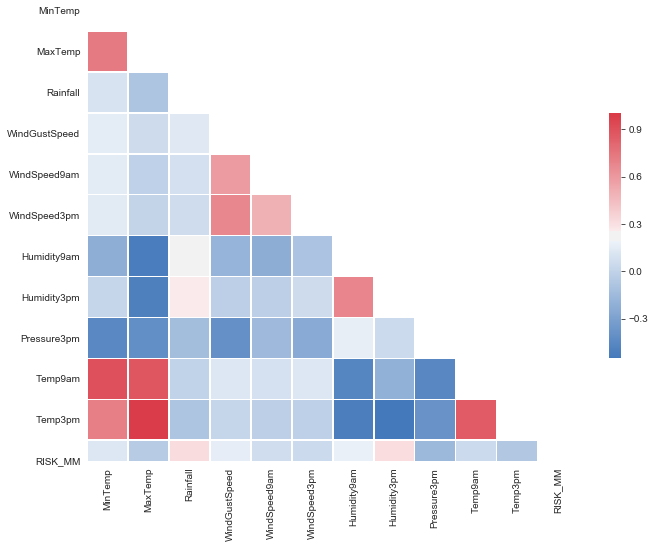

In [70]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df.corr(), dropDuplicates = True)

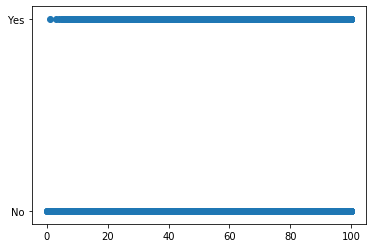

In [42]:
#plot feature against target to see how well a feature "separates" the classes
#how would you do this for a categorical variable like RainToday
fig, ax = plt.subplots()
ax.scatter(df.Humidity3pm,df.RainTomorrow)
plt.show()

What additional EDA can we do?

##### Modeling

In [43]:
from sklearn.model_selection import train_test_split

In [110]:
#first model uses only pressure at 3p to predict whethter it will rain tomrorow
#can you improve it? 
X = df[['Pressure3pm','Rainfall','WindSpeed3pm','Humidity3pm']]
y = df['RainTomorrow']

In [111]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
#initialize our model
log_reg_rain = LogisticRegression(max_iter=1000)

In [113]:
log_reg_rain

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
#fit our model with our training data
log_reg_rain.fit(X_train,y_train)

/Users/fabricemesidor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
y_train

95079      No
117428     No
91823      No
58282      No
127770    Yes
         ... 
94934     Yes
138471     No
130096     No
1087       No
20891      No
Name: RainTomorrow, Length: 90408, dtype: object

In [116]:
predictions = log_reg_rain.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
y_test

89157      No
36305      No
1724       No
118779     No
111957     No
         ... 
13512      No
71163      No
47198     Yes
17701      No
133278     No
Name: RainTomorrow, Length: 22603, dtype: object

In [119]:
#how well did our model predict our correct class? 
accuracy_score(y_test, predictions)

0.8339158518780693